In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from ito_diffusions.saw import SAW_2D

### Utility to generate colorful plot

In [2]:
def plot_saw(x, y, n, p):
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=1)

    # Create a continuous norm to map from data points to colors
    lc = LineCollection(segments, cmap='inferno')
    
    # Set the values used for colormapping
    lc.set_array(np.linspace(0, n, n+1))
    lc.set_linewidth(1)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)
    ax.set_title('SAW on {}-regular lattice, {} steps'.format(p, n))
    ax.set_xlim(x.min() - 1.0, x.max() + 1.0)
    ax.set_ylim(y.min() - 1.0, y.max() + 1.0)
    ax.axis('off')

    plt.tight_layout()
    plt.show()

### Initialize SAW

In [3]:
N = 1000
n_success = 1000
X = SAW_2D(N, n_success, verbose=True)

### Triangular lattice

1001it [00:18, 53.88it/s]                         


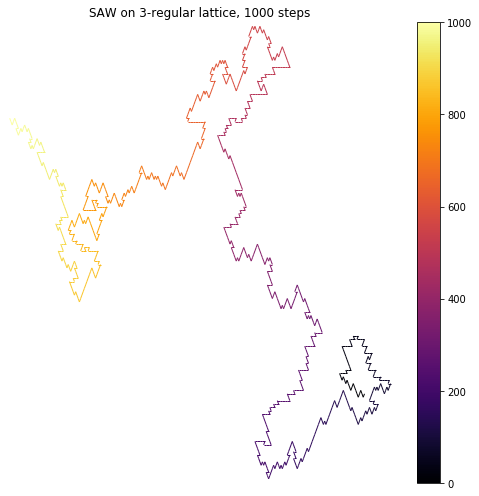

In [4]:
X.p = 3
df = X.simulate()
plot_saw(df['x'], df['y'], X.scheme_steps, X.p)

### Square lattice

1001it [00:14, 70.29it/s]                         


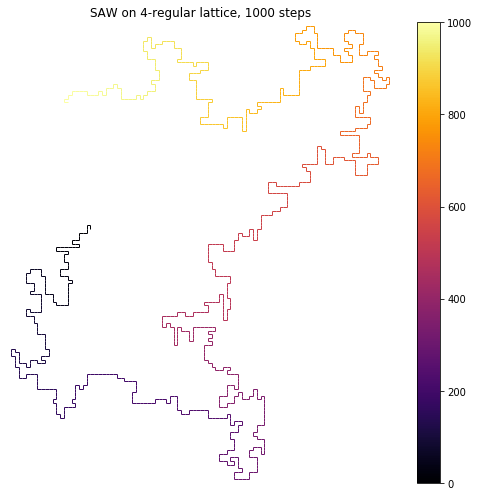

In [5]:
X.p = 4
df = X.simulate()
plot_saw(df['x'], df['y'], X.scheme_steps, X.p)

### Hexagonal lattice

1001it [00:11, 89.97it/s]                          


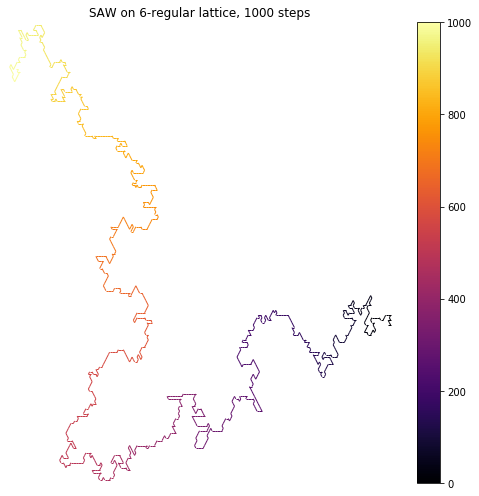

In [6]:
X.p = 6
df = X.simulate()
plot_saw(df['x'], df['y'], X.scheme_steps, X.p)